In [21]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
    
housing = load_housing_data()

In [22]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [25]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


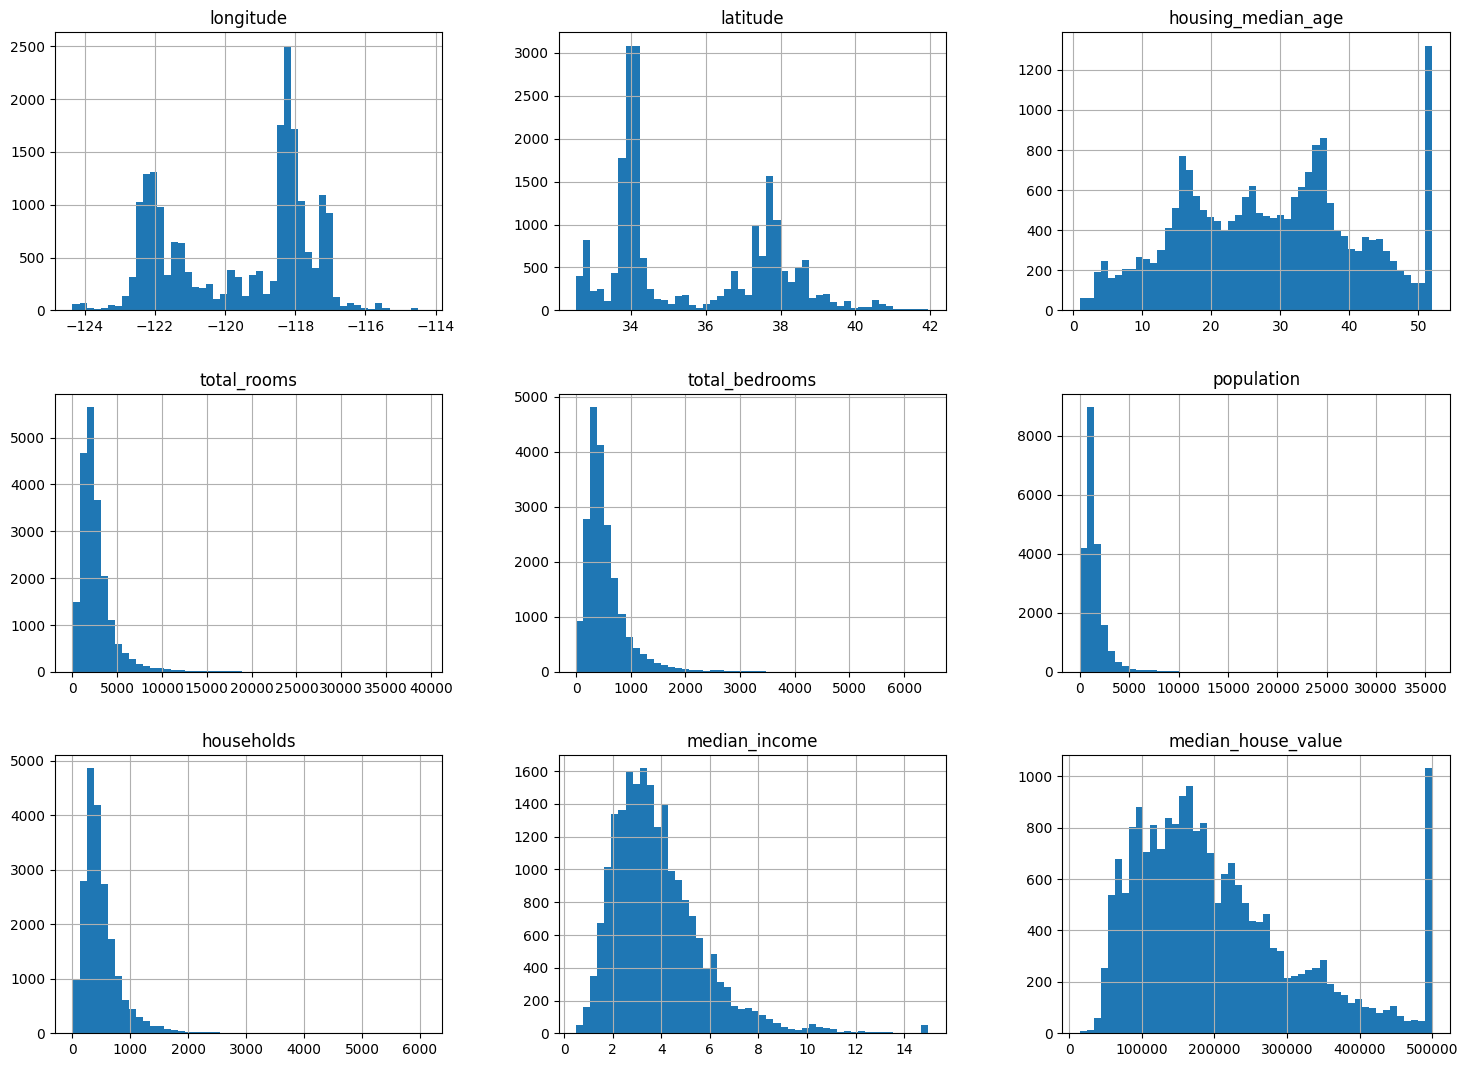

In [26]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(18, 13))
plt.show();

In [27]:
import numpy as np


In [28]:
def shuffle_and_split_data(data, test_ratio):   
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [29]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [30]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13909,-118.00,33.83,24.0,2578.0,580.0,1217.0,529.0,2.2401,212500.0,<1H OCEAN
17773,-118.40,34.08,52.0,3815.0,439.0,1266.0,413.0,15.0001,500001.0,<1H OCEAN
12999,-117.30,33.23,13.0,3619.0,791.0,1759.0,806.0,2.7650,98500.0,<1H OCEAN
1454,-121.85,37.28,17.0,4208.0,954.0,1476.0,904.0,2.3971,87500.0,<1H OCEAN
3140,-119.04,35.41,20.0,3268.0,833.0,1622.0,758.0,1.3587,67500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
4141,-119.23,34.27,29.0,3298.0,804.0,1509.0,711.0,3.8125,244500.0,NEAR OCEAN
4026,-122.15,37.44,52.0,1400.0,217.0,522.0,227.0,4.9861,500001.0,NEAR BAY
13303,-117.84,33.80,35.0,1490.0,251.0,629.0,257.0,4.3661,222100.0,<1H OCEAN
1557,-122.15,37.42,44.0,3558.0,839.0,1779.0,832.0,3.9243,404800.0,NEAR BAY


In [31]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13658,-123.21,39.07,17.0,1890.0,342.0,877.0,312.0,3.7833,159800.0,<1H OCEAN
16064,-120.11,34.66,18.0,1348.0,238.0,631.0,247.0,5.3154,289400.0,NEAR OCEAN
8631,-120.01,38.91,17.0,2732.0,609.0,1005.0,499.0,1.9851,86700.0,INLAND
15755,-118.13,33.84,46.0,2439.0,429.0,944.0,374.0,4.2841,312400.0,<1H OCEAN
17673,-118.00,33.67,34.0,3712.0,667.0,1521.0,632.0,4.8125,387800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
4971,-117.64,33.66,6.0,5221.0,1217.0,2597.0,1119.0,4.6076,204000.0,<1H OCEAN
10163,-117.65,33.60,13.0,2319.0,430.0,1004.0,380.0,5.1330,316100.0,<1H OCEAN
11296,-118.55,34.18,32.0,3011.0,529.0,1287.0,525.0,5.0605,311000.0,<1H OCEAN
19590,-121.76,41.50,31.0,602.0,153.0,112.0,47.0,1.0667,34200.0,INLAND


In [32]:
from zlib import crc32


In [33]:
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

In [34]:
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x : is_id_in_test_set(x , test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [35]:
# Using the row index as ID
housing_with_ID = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_ID, 0.2, "index")

In [36]:
# Using column value to create uniue IDs
housing_with_ID['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_data_with_id_hash(housing_with_ID, 0.2, "id")

In [37]:
housing_with_ID

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [38]:
# Can also use from Sklearn
from sklearn.model_selection import train_test_split

In [39]:
train_set, test_set = train_test_split(housing , test_size = 0.2, random_state=42)

* **Taking a look at the histogram for median income, most median income values are saturated from $15000 to $60000 but some go far beyond 6.**
* **It is important to have sufficient number of instances in your dataset from each stratum or its estimate of importance will be biased.**

In [40]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels = [1,2,3,4,5])

TypeError: 'str' object is not callable

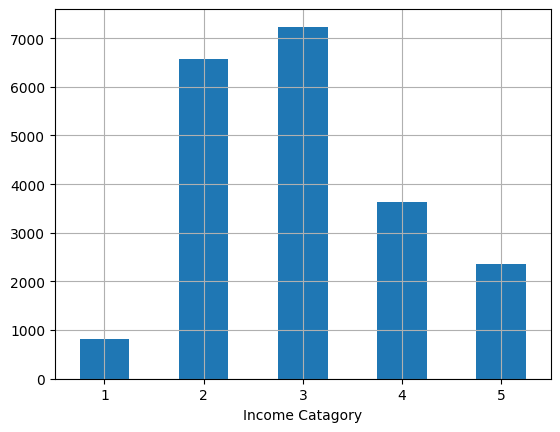

In [45]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel("Income Catagory")
plt.ylabel("Number of Districts")
plt.show()